# Câu hỏi: **Netflix có đang thay đổi chiến lược hợp tác với các đạo diễn và diễn viên nổi bật theo thể loại và thời gian không?**
**Lợi ích:**
- Giúp chúng ta hiểu rõ cách thức Netflix chọn lựa hợp tác với các đạo diễn và diễn viên qua thời gian, đặc biệt là trong các thể loại nội dung khác nhau.
- Bằng cách này, chúng ta có thể nhận thấy sự thay đổi trong chiến lược sản xuất nội dung, từ việc hợp tác với các nghệ sĩ nổi tiếng đến việc khai thác các tài năng mới.

**Cách làm:**
1. Phân tích sự xuất hiện của các đạo diễn và diễn viên theo từng thể loại qua các năm.
2. Tìm kiếm mối quan hệ giữa sự xuất hiện của các đạo diễn, diễn viên và thể loại nội dung.
3. Xem xét liệu có sự gia tăng sự hợp tác với các đạo diễn nổi bật trong các thể loại phim nổi tiếng (ví dụ, đạo diễn hành động hoặc tài liệu) không.

---

# Mục lục
* [A. Tiền xử lý](#part_a)
* [B. Phân tích](#part_b)
    * [1. Phân tích tổng quan](#1)
        * [1.1. Phân tích tổng số lượng đạo diễn và diễn viên duy nhất qua các năm](#11)
        * [1.2. Phân tích số lượng nội dung theo thể loại qua các năm](#12)
        * [1.3. Nhận xét](#13)
    * [2. Phân tích chi tiết](#2)
        * [2.1. Theo Đạo diễn](#21)
        * [2.2. Theo Diễn viên](#22)
    * [3. Kết quả và Nhận định](#3)
        * [3.1. Chiến lược hợp tác của Netflix](#31)
        * [3.2. Sự phát triển nội dung](#32)
        * [3.1. Tổng quan](#33)
* [Trả lời câu hỏi](#part_end)
---

## Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc file vào dataframe

In [2]:
df = pd.read_csv('../data/netflix_titles_cleaned.csv')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,season,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",NaN,90.0
1,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,NaN
3,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,NaN
4,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,NaN


## A. Tiền xử lý <a id="part_a"></a>

Loại bỏ các cột không cần thiết:
- `type`: Không ảnh hưởng đến phân tích đạo diễn và diễn viên.
- `country`: Không liên quan đến câu hỏi.
- `description`: Thông tin mô tả nội dung không phục vụ câu hỏi này.
- `season`: Dành cho TV Shows, không liên quan trực tiếp đến việc hợp tác.
- `duration`: Không ảnh hưởng đến chiến lược hợp tác.

In [3]:
processed_df = df.drop(columns=['type', 'country', 'description', 'season', 'duration'])

Tách `director`, `cast` ra các hàng riêng biệt.\
Tách thể loại từ `listed_in` để phân tích theo từng thể loại riêng.\
Chuyển đổi `date_added` sang định dạng ngày `datetime` để dễ dàng xử lý.\
Trích xuất năm `year_added` từ `date_added` để phân tích xu hướng hợp tác theo năm.\
Dùng mã hóa để biến đổi các giá trị phân loại (cột dạng chuỗi) thành số.
Tạo mã số cho cột `tilte` để đảm bảo không bị đếm trùng do các dòng lặp lại sau khi tách

In [4]:
processed_df = processed_df.assign(listed_in=processed_df['listed_in'].str.split(', ')).explode('listed_in')
processed_df = processed_df.assign(cast=processed_df['cast'].str.split(', ')).explode('cast')
processed_df = processed_df.assign(director=processed_df['director'].str.split(', ')).explode('director')
processed_df['date_added'] = pd.to_datetime(processed_df['date_added'], errors='coerce')
processed_df['year_added'] = processed_df['date_added'].dt.year
processed_df['listed_in_encoded'] = processed_df['listed_in'].astype('category').cat.codes
processed_df['id'] = processed_df['title'].factorize()[0]
processed_df.head()

,title,director,cast,date_added,release_year,rating,listed_in,year_added,listed_in_encoded,id
0,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,2021-09-25,2020,PG-13,Documentaries,2021,11,0
1,Blood & Water,UNKNOWN,Ama Qamata,2021-09-24,2021,TV-MA,International TV Shows,2021,20,1
1,Blood & Water,UNKNOWN,Khosi Ngema,2021-09-24,2021,TV-MA,International TV Shows,2021,20,1
1,Blood & Water,UNKNOWN,Gail Mabalane,2021-09-24,2021,TV-MA,International TV Shows,2021,20,1
1,Blood & Water,UNKNOWN,Thabang Molaba,2021-09-24,2021,TV-MA,International TV Shows,2021,20,1


## B. Phân tích <a id="part_b"></a>

### 1. Phân tích tổng quan <a id="1"></a>

#### 1.1. Phân tích tổng số lượng đạo diễn và diễn viên duy nhất qua các năm <a id="11"></a>

Số lượng đạo diễn duy nhất qua các năm:
year_added
2008       1
2009       2
2010       1
2011      14
2012       3
2013       8
2014      24
2015      77
2016     275
2017     870
2018    1137
2019    1343
2020    1240
2021     987
2024       2
Name: director, dtype: int64

Số lượng diễn viên duy nhất qua các năm:
year_added
2008        6
2009       18
2010       10
2011       97
2012       19
2013       65
2014      122
2015      507
2016     2357
2017     6372
2018     8516
2019    11672
2020    11524
2021     9575
2024       39
Name: cast, dtype: int64


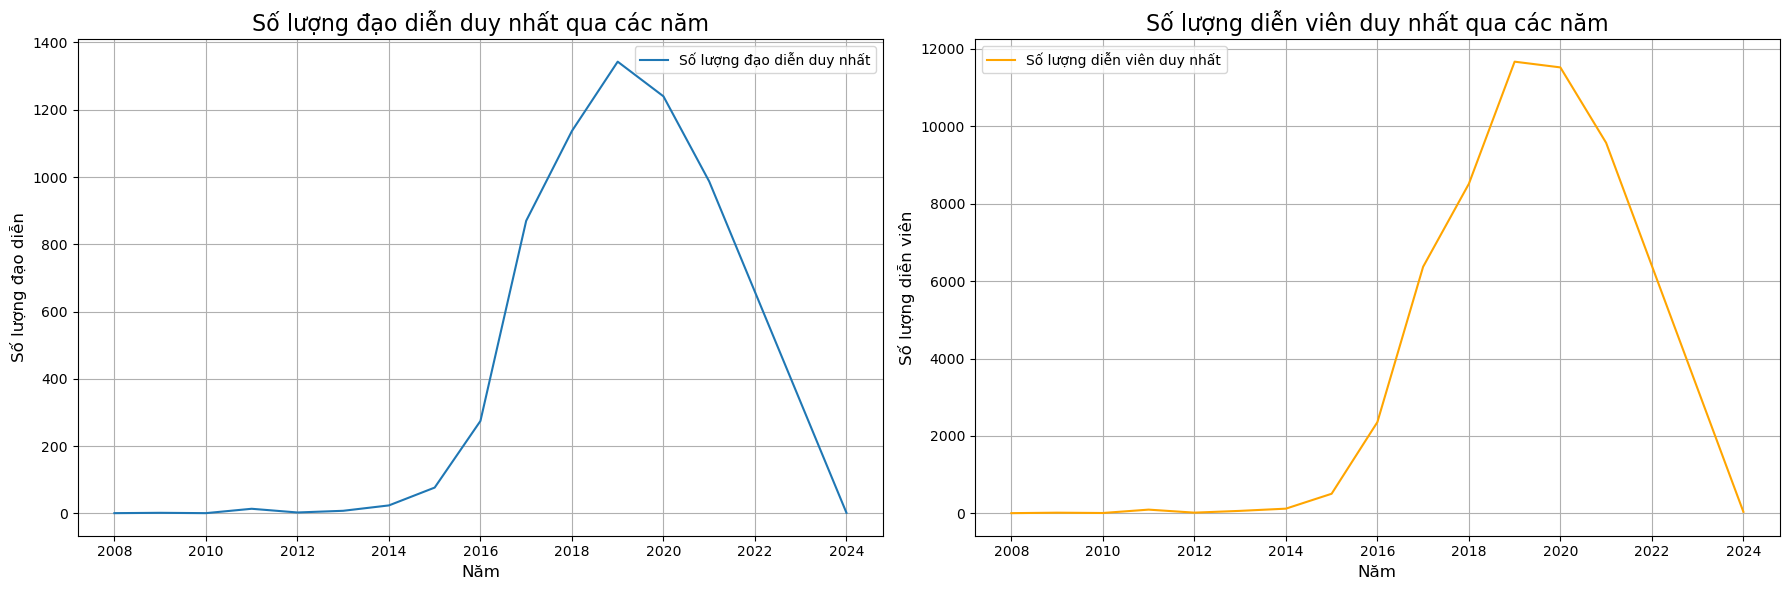

In [5]:
# Đếm số lượng đạo diễn duy nhất theo năm và lọc bỏ giá trị UNKNOWN
unique_directors_per_year = processed_df[processed_df['director'] != 'UNKNOWN'].groupby('year_added')['director'].nunique()

# Đếm số lượng diễn viên duy nhất theo năm và lọc bỏ giá trị UNKNOWN
unique_cast_per_year = processed_df[processed_df['cast'] != 'UNKNOWN'].groupby('year_added')['cast'].nunique()

# Hiển thị kết quả
print("Số lượng đạo diễn duy nhất qua các năm:")
print(unique_directors_per_year)
print()
print("Số lượng diễn viên duy nhất qua các năm:")
print(unique_cast_per_year)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ số lượng đạo diễn duy nhất
axes[0].plot(unique_directors_per_year.index, unique_directors_per_year.values, label='Số lượng đạo diễn duy nhất')
axes[0].set_title("Số lượng đạo diễn duy nhất qua các năm", fontsize=16)
axes[0].set_xlabel("Năm", fontsize=12)
axes[0].set_ylabel("Số lượng đạo diễn", fontsize=12)
axes[0].grid(True)
axes[0].legend()

# Biểu đồ số lượng diễn viên duy nhất
axes[1].plot(unique_cast_per_year.index, unique_cast_per_year.values, label='Số lượng diễn viên duy nhất', color='orange')
axes[1].set_title("Số lượng diễn viên duy nhất qua các năm", fontsize=16)
axes[1].set_xlabel("Năm", fontsize=12)
axes[1].set_ylabel("Số lượng diễn viên", fontsize=12)
axes[1].grid(True)
axes[1].legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


***Nhật xét***\
**Biểu đồ số lượng đạo diễn duy nhất qua các năm**\
Diễn biến:
- Số lượng đạo diễn hợp tác với Netflix bắt đầu tăng mạnh từ năm 2016 và đạt đỉnh vào năm 2019 (~1400 đạo diễn).
- Sau đó, từ năm 2020, số lượng giảm nhanh chóng, có thể do ảnh hưởng của dịch COVID-19 hoặc thay đổi chiến lược nội dung.

Nhận xét:
- Giai đoạn từ 2016 đến 2019 là thời kỳ mở rộng mạnh mẽ về hợp tác với đạo diễn, cho thấy Netflix tập trung vào việc sản xuất và phát triển nội dung mới với nhiều tài năng khác nhau.
- Sự suy giảm sau năm 2020 có thể phản ánh sự thay đổi chiến lược, tập trung vào chất lượng hơn số lượng, hoặc do các yếu tố bên ngoài như đại dịch.

**Biểu đồ số lượng diễn viên duy nhất qua các năm**\
Diễn biến:
- Tương tự đạo diễn, số lượng diễn viên tăng nhanh từ 2016 và đạt đỉnh vào năm 2019 (~12000 diễn viên).
- Từ năm 2020 trở đi, số lượng giảm mạnh.

Nhận xét:
- Việc mở rộng hợp tác với diễn viên trong giai đoạn 2016-2019 cho thấy Netflix đã đầu tư lớn vào việc sản xuất các nội dung phong phú với nhiều diễn viên tham gia.
- Từ năm 2020, xu hướng giảm cho thấy Netflix có thể đang tập trung vào tái sử dụng các diễn viên đã hợp tác, thay vì mở rộng mạng lưới diễn viên mới.


#### 1.2. Phân tích số lượng nội dung theo thể loại qua các năm <a id="12"></a>

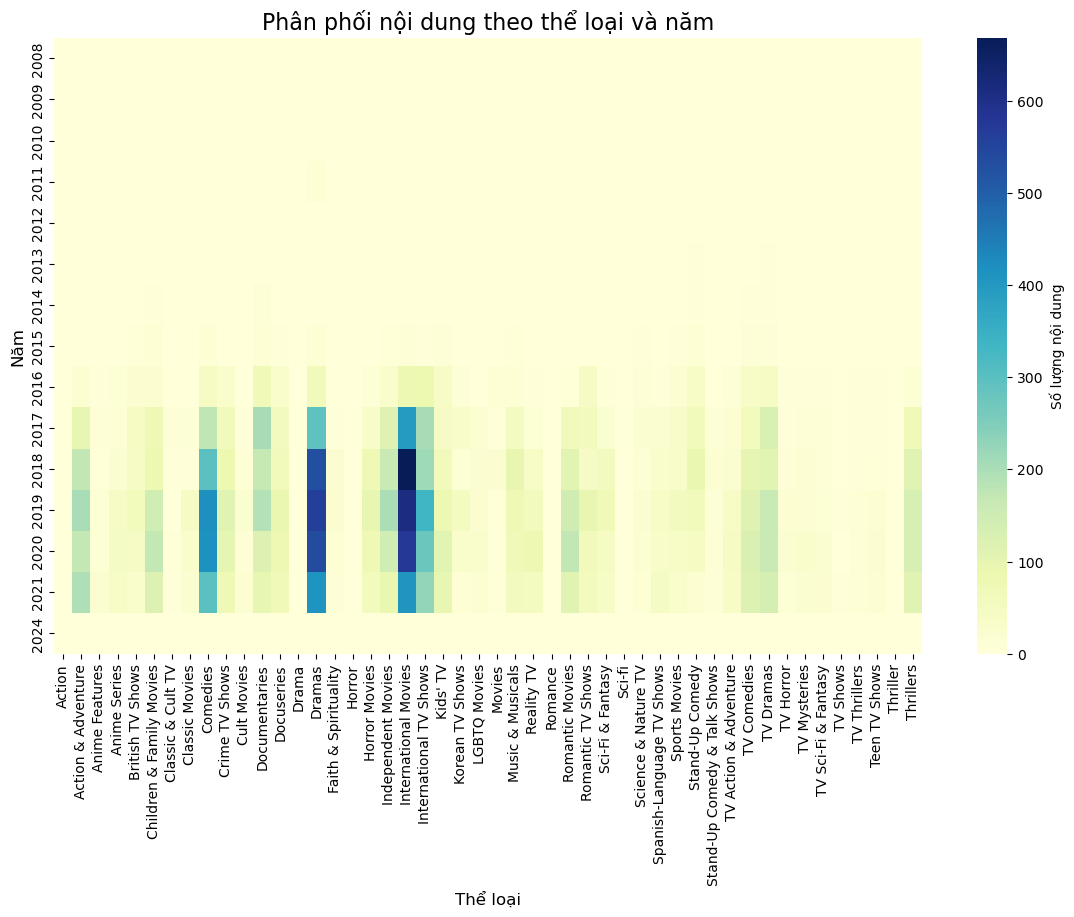

In [6]:
# Đếm số lượng nội dung theo thể loại và năm, dựa trên 'content_id'
content_by_genre_year = processed_df.groupby(['year_added', 'listed_in'])['id'].nunique().unstack(fill_value=0)

# Vẽ heatmap phân phối nội dung theo thể loại và năm
plt.figure(figsize=(14, 8))
sns.heatmap(content_by_genre_year, cmap="YlGnBu", cbar_kws={'label': 'Số lượng nội dung'})
plt.title("Phân phối nội dung theo thể loại và năm", fontsize=16)
plt.xlabel("Thể loại", fontsize=12)
plt.ylabel("Năm", fontsize=12)
plt.xticks(rotation=90)
plt.show()

***Nhận xét***\
**Biểu đồ phân phối nội dung theo thể loại và năm**\
Quan sát cho thấy một số thể loại nổi bật với số lượng nội dung tăng mạnh trong các năm:
- Dramas và Comedies: Hai thể loại được ưu tiên lớn nhất qua các năm.
- International TV Shows: Tăng trưởng nhanh từ 2018 trở đi, phản ánh chiến lược quốc tế hóa nội dung của Netflix.
- Documentaries: Có sự tăng nhẹ nhưng không chiếm ưu thế.
- Các thể loại như Anime, LGBTQ Movies, và Science & Nature TV có số lượng nội dung ít hơn nhưng vẫn duy trì mức độ phát triển ổn định qua các năm.

Nhận xét:
- Netflix đã ưu tiên mở rộng các thể loại phổ biến như Dramas và Comedies, phù hợp với xu hướng thị trường.
- Sự gia tăng của các thể loại quốc tế (International TV Shows) cho thấy nỗ lực mở rộng thị trường ra toàn cầu.
- Một số thể loại đặc thù (như Anime hoặc LGBTQ Movies) được duy trì, nhưng không phải là trọng tâm chính.

#### 1.3. Nhận xét <a id="13"></a>

- Giai đoạn từ 2016-2019 là thời kỳ Netflix đầu tư mạnh mẽ vào sản xuất nội dung, hợp tác với nhiều đạo diễn và diễn viên mới.
- Sau 2020, có sự giảm sút đáng kể trong số lượng hợp tác, có thể do dịch COVID-19 hoặc thay đổi chiến lược (tập trung vào chất lượng hơn số lượng).
- Các thể loại như Dramas, Comedies, và International TV Shows là trọng tâm của Netflix, phản ánh sự đầu tư vào thị trường toàn cầu và các nội dung giải trí phổ biến.

### 2. Phân tích chi tiết <a id="2"></a>

Trong một tập dữ liệu lớn như của Netflix, việc phân tích toàn bộ thể loại sẽ làm tăng độ phức tạp và khó tập trung vào các xu hướng chính. Vì vậy để phân tích chiến lược hợp tác của Netflix, cần tập trung vào các yếu tố nổi bật để làm rõ xu hướng và tối ưu hóa việc phân tích:
- Top 5 thể loại: Đại diện cho những lĩnh vực Netflix đầu tư mạnh mẽ và phản ánh thị hiếu khán giả.
- Top 3 đạo diễn: Nhằm nhận diện những cá nhân đóng vai trò quan trọng trong việc định hình chiến lược nội dung của Netflix.
- Top 3 diễn viên: Thể hiện sự ưu tiên của Netflix đối với các tài năng có ảnh hưởng lớn.

#### 2.1. Theo Đạo diễn <a id="21"></a>

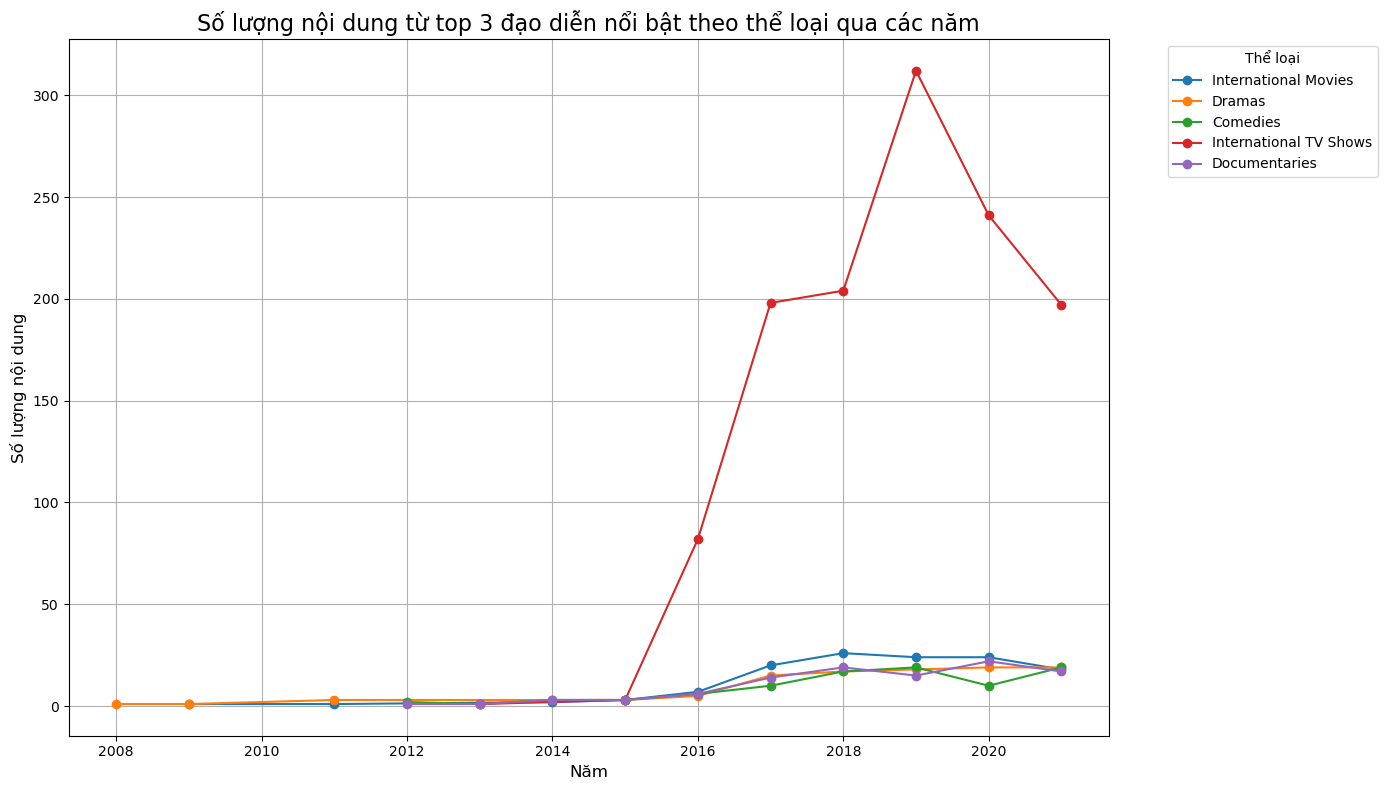

In [7]:
# 1. Xác định Top 5 thể loại nổi bật
top_5_genres = (
    processed_df.groupby('listed_in')['id']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# 2. Lọc dữ liệu cho Top 5 thể loại
top_5_genres_data = processed_df[processed_df['listed_in'].isin(top_5_genres)]

# 3. Nhóm dữ liệu theo năm, thể loại, và đạo diễn
genre_director_counts = (
    top_5_genres_data.groupby(['year_added', 'listed_in', 'director'])['id']
    .nunique()  # Đếm số lượng nội dung duy nhất
    .reset_index(name='content_count')
)

# 4. Lấy Top 3 đạo diễn cho mỗi thể loại theo từng năm
top_3_directors_per_genre = (
    genre_director_counts.sort_values(['year_added', 'listed_in', 'content_count'], ascending=[True, True, False])
    .groupby(['year_added', 'listed_in'])
    .head(3)  # Lấy top 3 đạo diễn mỗi thể loại
)

# 5. Tính tổng số lượng nội dung từ Top 3 đạo diễn theo năm cho mỗi thể loại
top_3_directors_total_by_year = (
    top_3_directors_per_genre.groupby(['year_added', 'listed_in'])['content_count']
    .sum()
    .reset_index()
)

# 6. Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for genre in top_5_genres:
    genre_data = top_3_directors_total_by_year[top_3_directors_total_by_year['listed_in'] == genre]
    if not genre_data.empty:  # Chỉ vẽ nếu có dữ liệu cho thể loại này
        plt.plot(
            genre_data['year_added'],
            genre_data['content_count'],
            marker='o',
            label=genre
        )

plt.title("Số lượng nội dung từ top 3 đạo diễn nổi bật theo thể loại qua các năm", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.legend(title="Thể loại", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


***Nhận xét***\
**Diễn biến chung**
- Giai đoạn trước 2015: Số lượng nội dung được tạo bởi các đạo diễn nổi bật trong tất cả các thể loại rất thấp, phản ánh Netflix chưa tập trung mạnh vào việc hợp tác với các đạo diễn nổi bật hoặc chưa mở rộng sản xuất nội dung nhiều thể loại.
- Giai đoạn 2016-2019: Đây là giai đoạn phát triển mạnh, đặc biệt với International TV Shows (đường màu đỏ), có sự tăng trưởng vượt bậc, đạt đỉnh vào năm 2019 (~300 nội dung). Các thể loại khác như Dramas (đường màu cam) và Comedies (đường màu xanh lá) cũng có sự gia tăng đáng kể, nhưng với tốc độ chậm hơn.
- Giai đoạn sau 2020: Tất cả các thể loại đều giảm mạnh về số lượng nội dung do các đạo diễn nổi bật tham gia, đặc biệt rõ rệt ở International TV Shows. Điều này có thể do sự thay đổi chiến lược của Netflix tập trung vào chất lượng thay vì số lượng, ảnh hưởng từ đại dịch COVID-19 làm gián đoạn sản xuất.

**Theo từng thể loại**
- International TV Shows (Đường màu đỏ): Dẫn đầu về số lượng nội dung do các đạo diễn nổi bật sản xuất. Phát triển mạnh từ năm 2016, đạt đỉnh năm 2019 (~300 nội dung), sau đó giảm mạnh.
- International Movies (Đường màu xanh): Tăng trưởng ổn định qua các năm nhưng không bùng nổ như TV Shows. Số lượng nội dung duy trì đều đặn ở mức trung bình (~50-100 nội dung mỗi năm).
- Dramas (Đường màu cam): Phát triển chậm nhưng ổn định, với số lượng nội dung dao động từ 50-100 trong giai đoạn 2017-2019.
- Comedies (Đường màu xanh lá): Có xu hướng tương tự Dramas, nhưng ít được đầu tư hơn.
- Documentaries (Đường màu tím): Là thể loại ít được các đạo diễn nổi bật tập trung, duy trì ở mức thấp nhất (~10-30 nội dung mỗi năm).

**Sự thay đổi chiến lược hợp tác:**
- Giai đoạn 2016-2019: Netflix đầu tư mạnh vào việc hợp tác với các đạo diễn nổi bật, đặc biệt ở thể loại International TV Shows, cho thấy mục tiêu mở rộng quy mô và thị trường toàn cầu.
- Sau 2020: Netflix thay đổi chiến lược, giảm sản xuất hàng loạt và có thể tập trung vào chất lượng nội dung.

**Tập trung vào thể loại:**
- International TV Shows và International Movies là hai thể loại được các đạo diễn nổi bật tham gia nhiều nhất, phù hợp với chiến lược quốc tế hóa nội dung của Netflix. Các thể loại khác như Dramas và Comedies tuy có tăng trưởng nhưng chưa phải là trọng tâm hàng đầu.

**Kết luận**
- Netflix đã thay đổi chiến lược hợp tác qua thời gian: Từ giai đoạn mở rộng (2016-2019) với trọng tâm là thể loại quốc tế, đến giai đoạn tinh gọn (sau 2020), tập trung nhiều hơn vào chất lượng thay vì số lượng.
- Thể loại International TV Shows đóng vai trò chủ chốt, thể hiện sự ưu tiên của Netflix trong việc mở rộng nội dung toàn cầu.
- Tầm quan trọng của các đạo diễn nổi bật: Các đạo diễn nổi bật đóng góp lớn vào thành công của các thể loại chính, đặc biệt là các thể loại thu hút thị trường quốc tế.

#### 2.2. Theo Diễn viên <a id="22"></a>

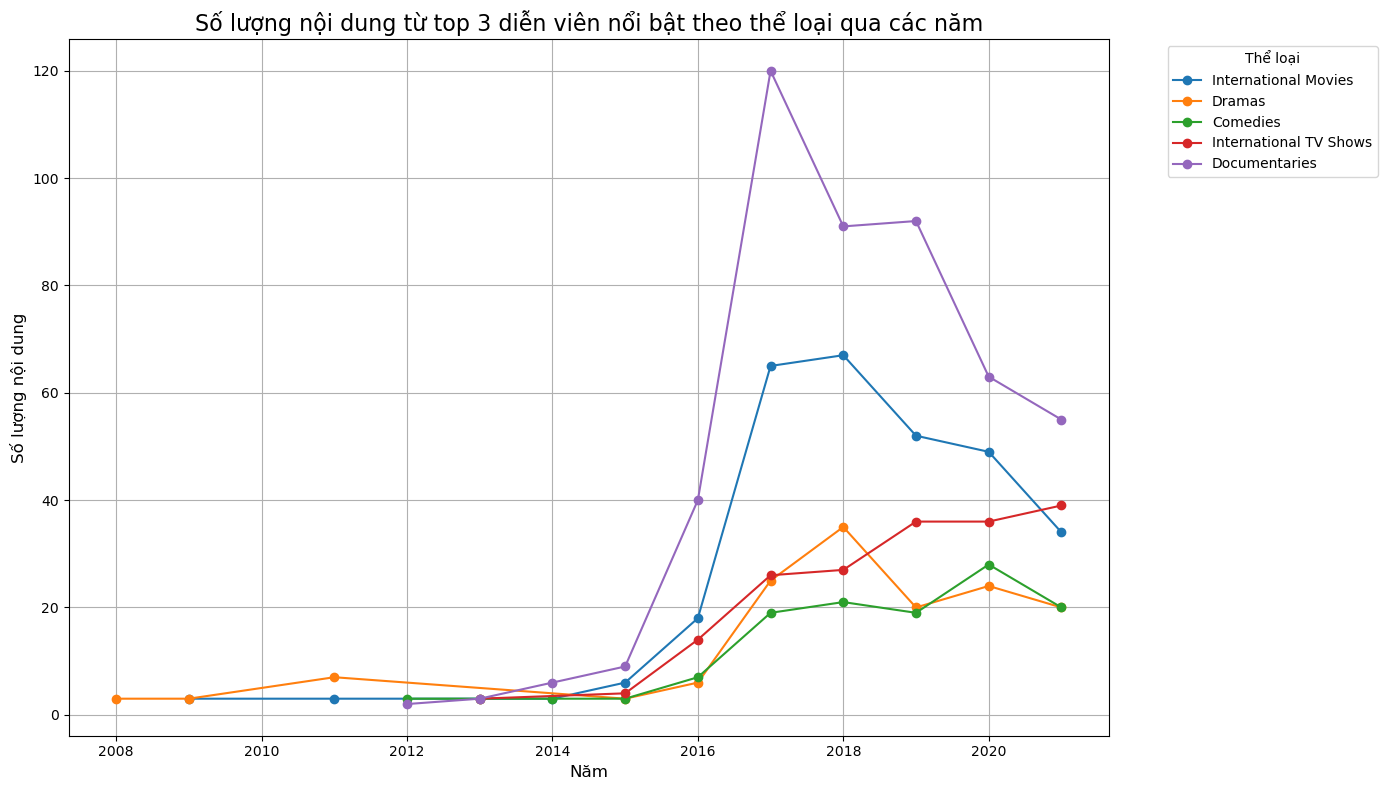

In [8]:
# 1. Xác định Top 5 thể loại nổi bật
top_5_genres = (
    processed_df.groupby('listed_in')['id']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# 2. Lọc dữ liệu cho Top 5 thể loại
top_5_genres_data = processed_df[processed_df['listed_in'].isin(top_5_genres)]

# 3. Nhóm dữ liệu theo năm, thể loại, và diễn viên
genre_actor_counts = (
    top_5_genres_data.groupby(['year_added', 'listed_in', 'cast'])['id']
    .nunique()  # Đếm số lượng nội dung duy nhất
    .reset_index(name='content_count')
)

# 4. Lấy Top 3 diễn viên cho mỗi thể loại theo từng năm
top_3_actors_per_genre = (
    genre_actor_counts.sort_values(['year_added', 'listed_in', 'content_count'], ascending=[True, True, False])
    .groupby(['year_added', 'listed_in'])
    .head(3)  # Lấy top 3 diễn viên mỗi thể loại
)

# 5. Tính tổng số lượng nội dung từ Top 3 diễn viên theo năm cho mỗi thể loại
top_3_actors_total_by_year = (
    top_3_actors_per_genre.groupby(['year_added', 'listed_in'])['content_count']
    .sum()
    .reset_index()
)

# 6. Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for genre in top_5_genres:
    genre_data = top_3_actors_total_by_year[top_3_actors_total_by_year['listed_in'] == genre]
    if not genre_data.empty:  # Chỉ vẽ nếu có dữ liệu cho thể loại này
        plt.plot(
            genre_data['year_added'],
            genre_data['content_count'],
            marker='o',
            label=genre
        )

plt.title("Số lượng nội dung từ top 3 diễn viên nổi bật theo thể loại qua các năm", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.legend(title="Thể loại", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


***Nhận xét***\
**Diễn biến chung**
- Trước 2015: Số lượng nội dung từ Top 3 diễn viên nổi bật trong tất cả các thể loại rất thấp, phản ánh Netflix chưa đầu tư mạnh vào việc hợp tác với các diễn viên nổi bật. Điều này có thể cho thấy chiến lược ban đầu của Netflix tập trung vào nội dung độc quyền mà không phụ thuộc vào những diễn viên đã có danh tiếng.
- Giai đoạn 2016-2019: Đây là thời kỳ tăng trưởng vượt bậc, số lượng nội dung từ các diễn viên nổi bật tăng mạnh ở hầu hết các thể loại.
    + Documentaries (Đường màu tím): Có mức tăng trưởng lớn nhất, đạt đỉnh vào năm 2018 (~120 nội dung). Điều này cho thấy Netflix đã hợp tác với nhiều diễn viên nổi bật để sản xuất các bộ phim tài liệu, phù hợp với xu hướng khán giả yêu thích nội dung thực tế và có giá trị thông tin.
    + International Movies (Đường màu xanh) và International TV Shows (Đường màu đỏ): Cả hai thể loại quốc tế có xu hướng tăng từ 2016, với International Movies duy trì mức ổn định (~60 nội dung) và International TV Shows dao động từ năm 2019. Chiến lược này nhấn mạnh việc Netflix mở rộng nội dung đa ngôn ngữ và thu hút các diễn viên quốc tế nổi bật.
- Sau 2020: Có sự giảm mạnh trong tất cả các thể loại, đặc biệt rõ ràng với Documentaries và International Movies. Điều này có thể phản ánh:
    + Sự thay đổi chiến lược của Netflix: tập trung vào việc tái sử dụng các diễn viên quen thuộc hoặc giảm sự phụ thuộc vào các diễn viên nổi bật để sản xuất nội dung đại trà.
    + Ảnh hưởng của các yếu tố bên ngoài như dịch COVID-19, gây ra sự gián đoạn trong sản xuất nội dung.

**Theo từng thể loại**
- Documentaries (Đường màu tím): Thể loại nổi bật nhất trong việc hợp tác với các diễn viên, đặc biệt từ 2016-2018. Chiến lược này có thể nhấn mạnh việc tạo dựng uy tín cho thể loại tài liệu bằng cách sử dụng các diễn viên hoặc người dẫn chuyện có danh tiếng.
- International Movies (Đường màu xanh): Tăng trưởng ổn định từ 2016-2018 và duy trì mức cao. Thể loại này cho thấy sự chú trọng của Netflix vào các thị trường quốc tế, hợp tác với các diễn viên nổi tiếng địa phương để tăng sức hút toàn cầu.
- International TV Shows (Đường màu đỏ): Tăng trưởng đều đặn nhưng không nổi bật như International Movies. Điều này có thể phản ánh chiến lược phát triển nội dung dài tập quốc tế với sự hợp tác ổn định.
- Dramas (Đường màu cam) và Comedies (Đường màu xanh lá): Có xu hướng tăng nhẹ nhưng không phải là trọng tâm chính. Số lượng nội dung thấp hơn, phản ánh chiến lược ưu tiên các thể loại quốc tế và tài liệu.

**Kết luận**
- Netflix đã thay đổi chiến lược hợp tác với diễn viên nổi bật qua các giai đoạn:
    + Giai đoạn trước 2015: Không tập trung vào các diễn viên nổi bật.
    + Giai đoạn 2016-2019: Mở rộng mạnh mẽ hợp tác với các diễn viên nổi bật, đặc biệt trong các thể loại quốc tế và tài liệu.
    + Sau 2020: Xu hướng giảm sút, có thể do thay đổi chiến lược hoặc các yếu tố bên ngoài như đại dịch.
- Các thể loại quốc tế (International Movies, International TV Shows) và tài liệu (Documentaries) chiếm phần lớn sự hợp tác với các diễn viên nổi bật, phản ánh chiến lược quốc tế hóa và tập trung vào nội dung thực tế.
- Nhìn chung: Netflix đã thay đổi chiến lược qua các giai đoạn, từ việc mở rộng mạng lưới diễn viên nổi bật (2016-2019) sang chiến lược tập trung hơn vào chất lượng và sử dụng các diễn viên quen thuộc sau 2020.

### 3. Kết quả và Nhận định <a id="3"></a>

#### 3.1. Chiến lược hợp tác của Netflix <a id="31"></a>

***Có sự thay đổi trong cách hợp tác với các đạo diễn và diễn viên nổi bật qua thời gian***

***Đạo diễn:***

Netflix đã có sự tăng trưởng mạnh mẽ trong việc hợp tác với các đạo diễn nổi bật từ giai đoạn 2016 đến 2019. Các thể loại International TV Shows và International Movies cho thấy sự tập trung lớn vào các thị trường quốc tế, nơi Netflix hợp tác với những đạo diễn nổi tiếng để tạo nội dung thu hút đối tượng khán giả toàn cầu. Sau 2020, sự hợp tác với các đạo diễn giảm mạnh, có thể do thay đổi chiến lược tập trung hơn vào chất lượng nội dung và giảm số lượng.

***Diễn viên:***

Giai đoạn từ 2016 đến 2019 chứng kiến sự gia tăng đáng kể hợp tác với các diễn viên nổi bật, đặc biệt trong thể loại Documentaries, phản ánh xu hướng khán giả quan tâm đến các nội dung thực tế và giáo dục. Tuy nhiên, sau 2020, sự hợp tác với các diễn viên nổi bật cũng giảm, tương tự như với đạo diễn, có thể là do đại dịch hoặc chiến lược tập trung vào các nội dung đã có thương hiệu. 

***Các thể loại nội dung có ảnh hưởng đến sự thay đổi***

- Thể loại nội dung đóng vai trò quan trọng trong chiến lược hợp tác của Netflix.
- International TV Shows và International Movies: Netflix đã ưu tiên các thể loại này để mở rộng thị trường quốc tế, hợp tác với các tài năng nổi bật địa phương.
- Documentaries: Netflix sử dụng các diễn viên và đạo diễn nổi bật để tăng sức hấp dẫn của các nội dung tài liệu.
- Dramas và Comedies: Tuy có tăng trưởng, nhưng đây không phải là trọng tâm chính so với các thể loại quốc tế hoặc tài liệu.

#### 3.2. Sự phát triển nội dung <a id="32"></a>

***Netflix đang tập trung vào các tài năng nổi tiếng hay khai thác tài năng mới***
- Giai đoạn 2016-2019: Netflix mở rộng mạnh mẽ hợp tác với các tài năng nổi tiếng trong cả đạo diễn và diễn viên, nhằm nhanh chóng xây dựng uy tín và cạnh tranh trên thị trường toàn cầu.
- Sau 2020: Xu hướng chuyển dịch, tập trung nhiều hơn vào việc khai thác nội dung từ các tài năng mới hoặc các tài năng đã hợp tác trước đó, thay vì mở rộng hợp tác với các tài năng nổi bật.

***Chiến lược có sự khác biệt theo thời gian***
- Giai đoạn đầu (trước 2015): Netflix tập trung vào nội dung độc quyền hơn là hợp tác với các tài năng nổi bật.
- Giai đoạn mở rộng (2016-2019): Netflix hợp tác với các đạo diễn và diễn viên nổi bật trên toàn cầu, đặc biệt là trong các thể loại quốc tế và tài liệu. Đây là giai đoạn bùng nổ cả về số lượng nội dung và mạng lưới hợp tác.
- Giai đoạn sau 2020: Netflix chuyển hướng, giảm sản xuất hàng loạt và tập trung hơn vào nội dung chất lượng. Sự hợp tác với các tài năng nổi bật giảm, có thể là do chi phí cao hoặc Netflix đã xây dựng được thương hiệu mạnh và không còn phụ thuộc nhiều vào các tài năng nổi bật.

#### 3.3. Tổng quan <a id="33"></a>

Netflix đã thay đổi chiến lược hợp tác với các đạo diễn và diễn viên nổi bật qua các giai đoạn, từ tập trung vào mở rộng và hợp tác với các tài năng nổi tiếng, đến việc chuyển sang tập trung vào chất lượng và thị trường mục tiêu sau 2020.Các thể loại nội dung đóng vai trò quan trọng trong việc định hình chiến lược hợp tác của Netflix, đặc biệt là các thể loại quốc tế và tài liệu.Tài năng nổi bật đóng vai trò lớn trong việc xây dựng thương hiệu nội dung, nhưng chiến lược của Netflix hiện nay dường như hướng đến khai thác tài năng đã hợp tác trước đây hoặc các tài năng mới hơn.

## Trả lời câu hỏi <a id="part_end"></a>

***Netflix có đang thay đổi chiến lược hợp tác với các đạo diễn và diễn viên nổi bật theo thể loại và thời gian không?***

Có. Netflix đã thay đổi chiến lược hợp tác qua từng giai đoạn: Từ việc mở rộng mạnh mẽ hợp tác với các tài năng nổi bật trong giai đoạn 2016-2019, đặc biệt ở các thể loại quốc tế và tài liệu, Netflix đã chuyển sang giai đoạn tập trung hơn vào chất lượng, giảm sự phụ thuộc vào các đạo diễn và diễn viên nổi bật sau 2020.

Các thể loại nội dung đóng vai trò lớn trong việc định hình chiến lược hợp tác của Netflix:

- International TV Shows và International Movies cho thấy sự ưu tiên mở rộng thị trường quốc tế.
- Documentaries phản ánh xu hướng tập trung vào nội dung thực tế, giáo dục.

Nguyên nhân thay đổi: Sự bão hòa của thị trường, chi phí hợp tác cao, và nhu cầu về nội dung chất lượng hơn số lượng có thể là lý do chính khiến Netflix điều chỉnh chiến lược hợp tác.
